## Phishing Dectection Using Logistic Regression and Ensemble methods of Machine Learning

### Overview
In this project, we'll build a classification system to detect the legitimacy of an URL and thus classify them a 'Phishing' and 
'Legitimate' using Machine Learning algorithms like <b>Logistic Regression</b> and Ensemble methods like 
<b>Bagging(Randon Forest classifer)</b> and <b>Boosting(AdaBoost and XGD Boosting)</b>.

We'll be doing the following steps to implement our project:

- We'll collect the data
- We'll first carry out a preliminary analysis to explore the data and check for their completeness, Relevancy, Validity 
  and Integrity
- We'll then preprocess the data, first by splitting it into a train set(used for training our model) and 
  test set(used to evaluate the performance of our model).
- Then carry out the process of <b>Feature Selection</b>, which helps our model <b>train faster, reduces the complexity</b> and 
  <b>improves the accuracy</b>
- We'll then fit our model and compare the performance of Logistic Regression against the Ensemble methods

### Data
- The dataset ‘Phishing website Dataset’ has been taken from Kaggle 
- It consists of legitimate and phishing URLs, the legitimate sites are taken from ‘Yahoo’ and ‘starting point directory’ 
  and the phishing sites from the ‘Phishtank data archive’. 
- The data consists of 11055 URLs and 32 features. There are 6157 legitimate, 4898 phishing websites. 



In [1]:
# Libraries required for data processing and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data file in the csv format
data = pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [4]:
data['Result'].replace({1 :'Legitimate', -1 :'Phishing'},inplace=True)

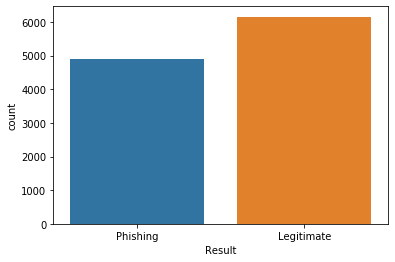

In [7]:
sns.countplot(data['Result'])

In [8]:
# removing the index column and replacing the negative value for the process of feature selection
data.drop('index', axis = 1, inplace = True)
data.replace({-1:2}, inplace=True)

In [9]:
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,1,...,1,1,2,2,2,2,1,1,2,Phishing
1,1,1,1,1,1,2,0,1,2,1,...,1,1,2,2,0,2,1,1,1,Phishing
2,1,0,1,1,1,2,2,2,2,1,...,1,1,1,2,1,2,1,0,2,Phishing
3,1,0,1,1,1,2,2,2,1,1,...,1,1,2,2,1,2,1,2,1,Phishing
4,1,0,2,1,1,2,1,1,2,1,...,2,1,2,2,0,2,1,1,1,Legitimate


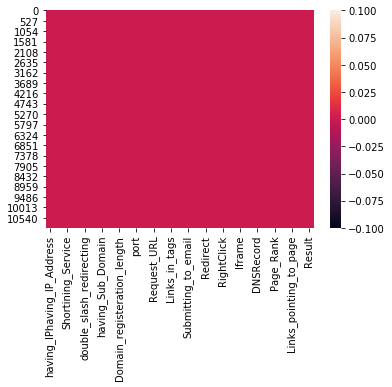

In [10]:
#this heatmap represents the presence of no null values
sns.heatmap(data.isnull())

In [11]:
# Creating independent and dependent variables
X = data.drop('Result', axis=1)
y = data['Result']

### Data Preprocessing

In [14]:
# Splitting the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

### Feature Selection
In this process, we identify features which has the most influence on the result variable using the Chi2 test.

In [15]:
# Chi2 test on our training dataset to find the most relevant features
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 11.191841
Feature 1: 1.220830
Feature 2: 2.565374
Feature 3: 2.366921
Feature 4: 0.698187
Feature 5: 56.722424
Feature 6: 33.428590
Feature 7: 138.979136
Feature 8: 51.286348
Feature 9: 0.003062
Feature 10: 1.181231
Feature 11: 1.364872
Feature 12: 88.415885
Feature 13: 2238.666182
Feature 14: 197.181616
Feature 15: 51.419478
Feature 16: 0.533514
Feature 17: 2.449819
Feature 18: 4.116745
Feature 19: 1.334219
Feature 20: 0.058313
Feature 21: 0.002525
Feature 22: 0.059811
Feature 23: 19.736243
Feature 24: 6.873871
Feature 25: 1.249762
Feature 26: 9.553555
Feature 27: 14.340002
Feature 28: 35.398027
Feature 29: 5.145421


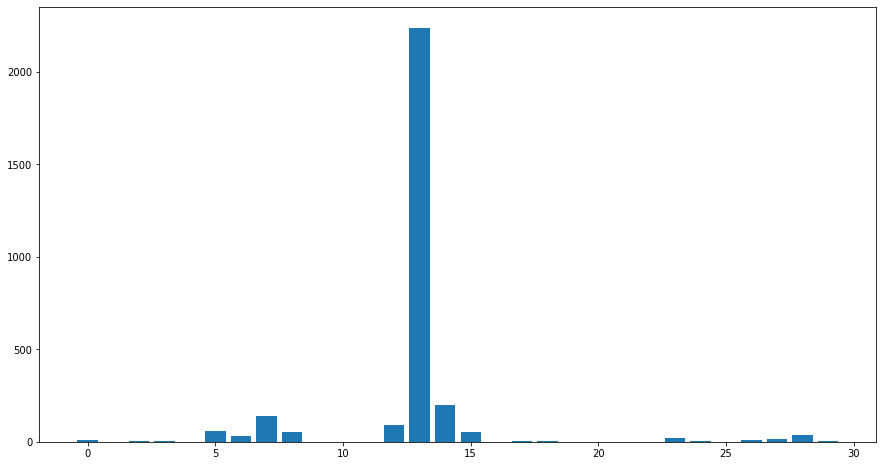

In [16]:
# PLotting the feature scores of the features, features with high scores are considered more relevant comparatively
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (15,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [42]:
data.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [17]:
# 5,6,7,8,12,13,14,15,27,28 (Selected features)
new_data = data.filter(['double_slash_redirecting','Prefix_Suffix','having_Sub_Domain','SSLfinal_State', 'HTTPS_token',
                        'Request_URL','URL_of_Anchor','Links_in_tags','Page_Rank','Google_Index','Result'],axis=1)

In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   double_slash_redirecting  11055 non-null  int64 
 1   Prefix_Suffix             11055 non-null  int64 
 2   having_Sub_Domain         11055 non-null  int64 
 3   SSLfinal_State            11055 non-null  int64 
 4   HTTPS_token               11055 non-null  int64 
 5   Request_URL               11055 non-null  int64 
 6   URL_of_Anchor             11055 non-null  int64 
 7   Links_in_tags             11055 non-null  int64 
 8   Page_Rank                 11055 non-null  int64 
 9   Google_Index              11055 non-null  int64 
 10  Result                    11055 non-null  object
dtypes: int64(10), object(1)
memory usage: 950.2+ KB


In [19]:
# Creating independent and dependent variables
X = new_data.drop('Result', axis=1)
y = new_data['Result']

In [20]:
# Splitting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
# training the model using the train set
logmodel = LogisticRegression()
classifier = logmodel.fit(X_train,y_train)

# Predicting using the test set
pred = logmodel.predict(X_test)

              precision    recall  f1-score   support

  Legitimate       0.82      0.87      0.85      1818
    Phishing       0.83      0.77      0.80      1499

    accuracy                           0.83      3317
   macro avg       0.83      0.82      0.82      3317
weighted avg       0.83      0.83      0.82      3317

[[1587  231]
 [ 348 1151]]


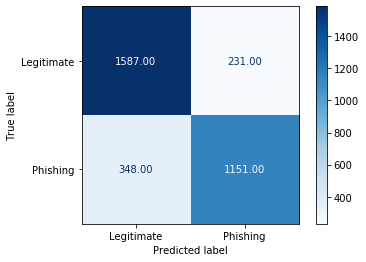

In [25]:
# Classification report and Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

# plotting the consfusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues',values_format= '.2f')

In [24]:
# Accuracy of the model predictions
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred, normalize=True))

0.825444678926741


### Bagging(Random Forest Classifier)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# training the model using the train set
rf = RandomForestClassifier()
#number of trees
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
#best estimator
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


In [28]:
# Predicting using the test set
rpred = rf_gs.predict(X_test)

              precision    recall  f1-score   support

  Legitimate       0.93      0.97      0.95      1818
    Phishing       0.96      0.91      0.93      1499

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317

[[1755   63]
 [ 131 1368]]


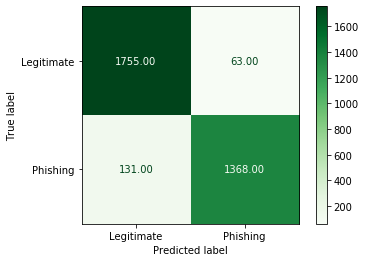

In [29]:
# Classification report and Confusion matrix
print(classification_report(y_test,rpred))
print(confusion_matrix(y_test,rpred))

# plotting the consfusion matrix
plot_confusion_matrix(rf_gs, X_test, y_test, cmap='Greens',values_format= '.2f')

In [30]:
# Accuracy of the model predictions
print(accuracy_score(y_test, rpred, normalize=True))

0.9415134157371119


### Boosting (XGBoost)

In [31]:
from xgboost import XGBClassifier
model = XGBClassifier()
# training the model using the train set
model.fit(X_train, y_train)
# Predicting using the test set
model_pred = model.predict(X_test)

In [63]:
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

              precision    recall  f1-score   support

  Legitimate       0.93      0.97      0.95      1818
    Phishing       0.96      0.91      0.93      1499

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317

[[1758   60]
 [ 137 1362]]


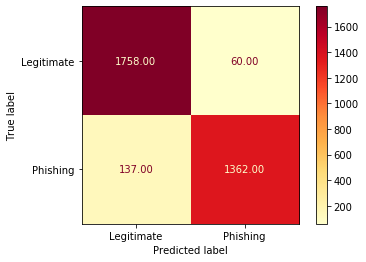

In [32]:
# Classification report and Confusion matrix
print(classification_report(y_test,model_pred))
print(confusion_matrix(y_test,model_pred))
# plotting the consfusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap='YlOrRd',values_format= '.2f')

In [33]:
# Accuracy of the model predictions
print(accuracy_score(y_test, model_pred, normalize=True))

0.9406089840217063


### Boosting (AdaBoost)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier(n_estimators = 30, random_state= 100)
# training the model using the train set
model2.fit(X_train, y_train)
# predicting using the test set
model2_pred= model2.predict(X_test)

              precision    recall  f1-score   support

  Legitimate       0.91      0.95      0.93      1818
    Phishing       0.94      0.89      0.91      1499

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

[[1730   88]
 [ 172 1327]]


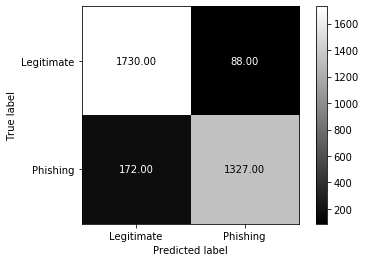

In [35]:
# Classification report and Confusion matrix
print(classification_report(y_test,model2_pred))
print(confusion_matrix(y_test,model2_pred))

# plotting the confusion matrix
plot_confusion_matrix(model2, X_test, y_test, cmap='gray',values_format= '.2f')

In [36]:
# Accuracy of the model predictions
print(accuracy_score(y_test, model2_pred, normalize=True))

0.9216159179981911


Accuracy of the model predictions
- Logistic Regression: 83%
- Bagging (Randon Forest Classifier): 94%
- Boosting (XGBoost): 94%
- Boosting (AdaBoost): 92%
    
The Ensemble methods performed considerably well by drastically improving the accuray when compared to the Logistic Regression.